# **Tugas Machine Learning 2023**

**Program Image Detection Chest X-Ray (Covid,Pneumonia,Normal)**

**Model Convolutional Neural Network**

**Alvito Dwinovan Wibowo - 140910200040**



Import Library yang dipakai

In [2]:
# Alvito Dwinovan Wibowo
# Program Image Detection COVID, PNEUMONIA, NORMAL

# Import Library dan Modul yang diperlukan
# Import Data Science Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import itertools
import random

# Import visualization libraries
import os
import glob
import random
import shutil
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Input

import warnings
warnings.filterwarnings('ignore')

Exploratory Data Analysis

In [3]:
import os

base_dir = 'C:\\Alvito\\UNPAD\\SEMESTER 7\\Machine Learning aweu\\Tubes_ML\\Chest X-Ray'

# Menampilkan daftar file dan direktori di dalam base_dir
for file_or_dir in os.listdir(base_dir):
    print(file_or_dir)


COVID
NORMAL
PNEUMONIA
s41598-020-74539-2.pdf
Tubes ML_Alvito Dwinovan_CNN - Chest X ray.ipynb


In [4]:
def check_dir(dir: str = None, labels: list = None):
    for label in labels:
        num_data = len(os.listdir(os.path.join(dir, label)))
        print(f'Jumlah {label}: {num_data}')
print('Jumlah gambar pada setiap label: \n' + '='*50)
check_dir(base_dir,['COVID','NORMAL','PNEUMONIA'])

Jumlah gambar pada setiap label: 
Jumlah COVID: 1626
Jumlah NORMAL: 1802
Jumlah PNEUMONIA: 1800


Membuat direktori untuk train dan validation

In [5]:
def create_directories(base_dir=None, sub_dir=None, labels=None):

    # Buat direktori 'train' dan/atau 'test'
    # Jika direktori tersebut sudah ada maka akan melanjutkan dan tidak akan muncul error.
    for sub in sub_dir:
        dir_path = os.path.join(base_dir, sub)
        os.makedirs(dir_path, exist_ok=True)

    # Buat direktori berisi nama labels
    for label in labels:
        for sub in sub_dir:
            label_dir = os.path.join(base_dir, sub, label)
            os.makedirs(label_dir, exist_ok=True)

    return f'Telah berhasil membuat sub directories :{sub_dir} dan labels: {labels}'

In [6]:
labels = ['COVID','NORMAL','PNEUMONIA']
list_sub_dir = ['train', 'validation']

#panggil prosedur create_directories
create_directories(base_dir,  list_sub_dir, labels)

"Telah berhasil membuat sub directories :['train', 'validation'] dan labels: ['COVID', 'NORMAL', 'PNEUMONIA']"

In [7]:
# Path ke folder 'train', dan 'test'
train_folder = os.path.join(base_dir,'train')
val_folder = os.path.join(base_dir,'validation')

# path ke folder 'rock', 'paper', 'scissors' (tempat file gambar)
COVID_folder = os.path.join(base_dir,'COVID')
NORMAL_folder = os.path.join(base_dir,'NORMAL')
PNEUMONIA_folder = os.path.join(base_dir,'PNEUMONIA')

In [8]:
import shutil
def split_data(source=None, destination=None, label=None,split_percentage=None):

    files = os.listdir(source)
    num_files = len(files)
    num_train = int(num_files * split_percentage)

    # Acak urutan file
    random.shuffle(files)

    train_files = files[:num_train]
    test_files = files[num_train:]

    # Pindahkan file ke folder tujuan
    for file in train_files:
        source_file = os.path.join(source, file)
        destination_file = os.path.join(destination[0],label)
        shutil.copy(source_file, destination_file)

    for file in test_files:
        source_file = os.path.join(source, file)
        destination_file = os.path.join(destination[1],label)
        shutil.copy(source_file, destination_file)

    return 'Telah berhasil memasukkan data'


In [9]:
# Persentase data yang akan digunakan sebagai split data
train_percentage = 0.8

#list folder train dan test
destination_folder= [train_folder,val_folder]
# Bagi data untuk masing-masing label
split_data(COVID_folder, destination_folder, 'COVID', train_percentage)
split_data(NORMAL_folder, destination_folder, 'NORMAL', train_percentage)
split_data(PNEUMONIA_folder, destination_folder,'PNEUMONIA', train_percentage)

'Telah berhasil memasukkan data'

In [10]:
# Cek jumlah hasil split
train_sum = 0
validation_sum = 0

for i in os.listdir(base_dir + '/train'):
  res = base_dir + '/train/' + i
  train_sum += len(os.listdir(res))

for i in os.listdir(base_dir + '/validation'):
  res = base_dir + '/validation/' + i
  validation_sum += len(os.listdir(res))

print(f"File Train : {train_sum} images")
print(''+ '='*50)
check_dir(train_folder,['COVID','NORMAL','PNEUMONIA'])

print(f"\nFile Validation : {validation_sum} images")
print('' + '='*50)
check_dir(val_folder,['COVID','NORMAL','PNEUMONIA'])

File Train : 4181 images
Jumlah COVID: 1300
Jumlah NORMAL: 1441
Jumlah PNEUMONIA: 1440

File Validation : 1047 images
Jumlah COVID: 326
Jumlah NORMAL: 361
Jumlah PNEUMONIA: 360


Visualisasi dataset

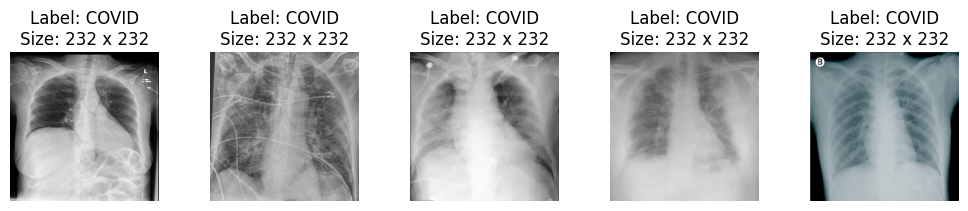

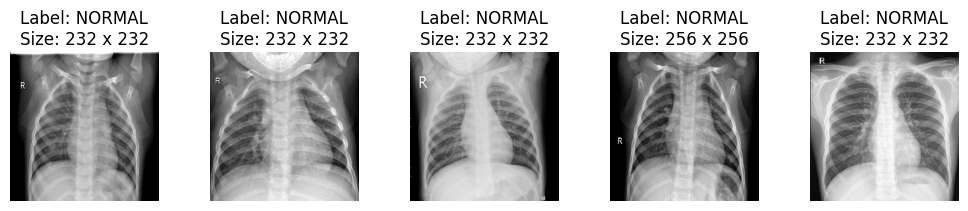

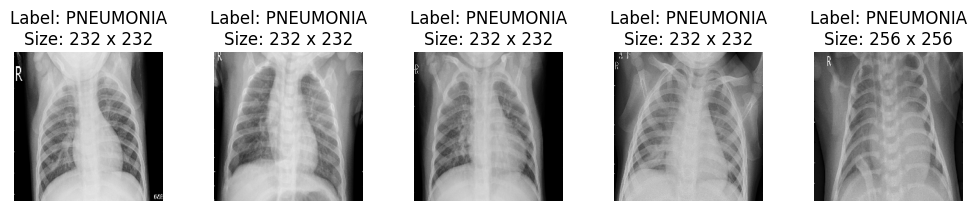

In [11]:
def visualize_random_data(data_dir, label, num_samples=5):
    label_dir = os.path.join(data_dir, label)
    image_files = os.listdir(label_dir)

    num_samples = min(num_samples, len(image_files))
    random_images = random.sample(image_files, num_samples)

    fig, axes = plt.subplots(1, num_samples, figsize=(10, 2), constrained_layout=True)

    # Kurangi jarak antara subplot horizontal dan vertikal
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

    for j, random_image in enumerate(random_images):
        image_path = os.path.join(label_dir, random_image)

        img = mpimg.imread(image_path)
        image_size = f'Size: {img.shape[1]} x {img.shape[0]}'  # Menampilkan ukuran gambar
        title = f'Label: {label}\n{image_size}'  # Gabungkan label dan ukuran

        axes[j].imshow(img)
        axes[j].set_title(title)
        axes[j].axis('off')

    plt.show()

visualize_random_data(base_dir, label='COVID', num_samples=5)
visualize_random_data(base_dir, label='NORMAL', num_samples=5)
visualize_random_data(base_dir, label='PNEUMONIA', num_samples=5)

Augmentasi Gambar

In [12]:
BATCH_SIZE = 32
TARGET_SIZE = (224, 224)

In [13]:
# Membuat objek ImageDataGenerator dengan augmentasi gambar
train_datagen = ImageDataGenerator(
     rescale = 1./255,
    rotation_range = 90,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    brightness_range=[0.5, 1.5],
    width_shift_range=0.1,
    height_shift_range=0.1,)

validation_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 90,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    brightness_range=[0.5, 1.5],
    width_shift_range=0.1,
    height_shift_range=0.1,)

In [14]:
# Menggunakan objek ImageDataGenerator untuk memuat data train dan validation
train_generator = train_datagen.flow_from_directory(
    base_dir + '/train',
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    base_dir + '/validation',
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical'
)

class_indices = train_generator.class_indices
print(class_indices)

Found 4181 images belonging to 3 classes.
Found 1047 images belonging to 3 classes.
{'COVID': 0, 'NORMAL': 1, 'PNEUMONIA': 2}


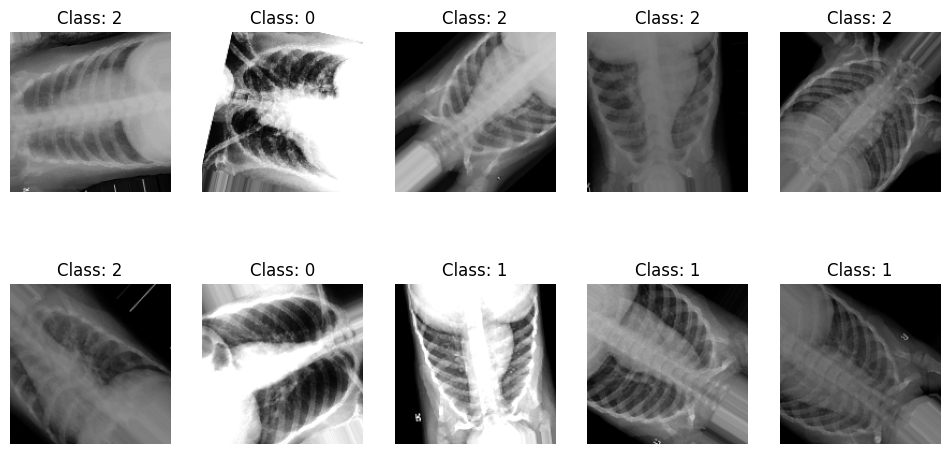

In [15]:
def display_augmented_images(data_generator, num_samples_to_display=10):
    num_rows= 2
    num_cols = int(num_samples_to_display/num_rows)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))
    for i in range(num_rows):
        for j in range(num_cols):
            batch = data_generator.next()
            image = batch[0][0]  # Ambil gambar pertama dari batch
            label = batch[1][0]  # Ambil label pertama dari batch

            # Konversi label dalam format one-hot encoding ke kelas asli
            class_index = label.argmax()

            # Menampilkan gambar
            axes[i, j].imshow(image)
            axes[i, j].set_title(f"Class: {class_index}")
            axes[i, j].axis('off')

    plt.show()

display_augmented_images(train_generator, num_samples_to_display=10)


Pembuatan Model Machine Learning

In [3]:
import tensorflow as tf

img_height = 150
img_width = 150
input_shape = (img_height, img_width, 3)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),  # Adding an extra layer for complexity
    tf.keras.layers.Dense(3, activation='softmax')  # 4 output classes
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

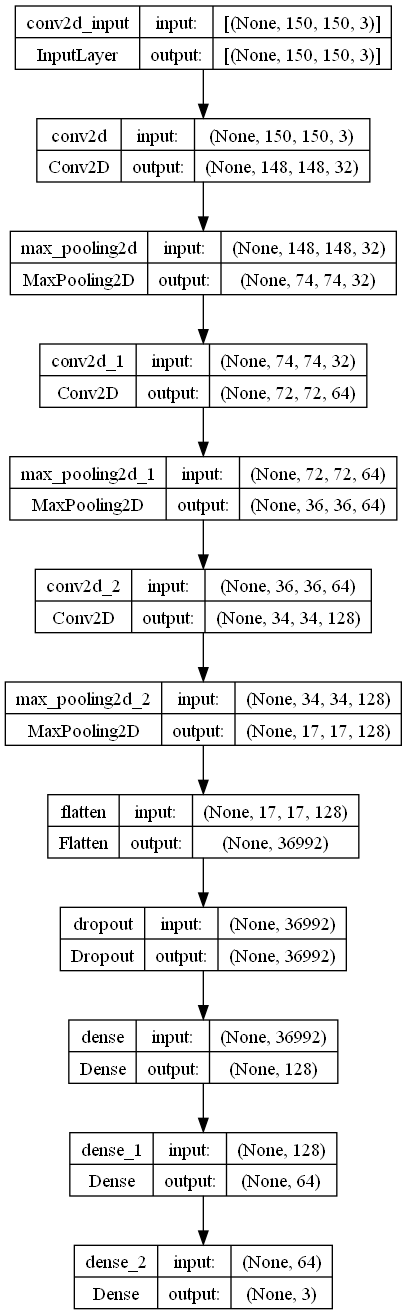

In [9]:
from tensorflow.keras.utils import plot_model
# Visualize the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [17]:
# Compile model dengan optimizer Nadam, loss function 'categorical_crossentropy', dan metrik 'accuracy'
from tensorflow.keras.optimizers import Nadam

model.compile(loss='categorical_crossentropy',
              optimizer = Nadam(),
              metrics=['accuracy'])

In [18]:
# Membuat callback untuk menghentikan training apabila sudah mencapai akurasi diatas 90%

class TestCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.90 and logs.get('val_accuracy') >= 0.90):
            print("\nAkurasi telah mencapai >=90%!")
            self.model.stop_training = True
            
# Definisikan callback untuk menyimpan model terbaik
checkpoint = ModelCheckpoint('model_tubesML_terbaik.h5', save_best_only=True)
callbacks = [TestCallback(), checkpoint]

Training Data

In [19]:
import time
start_time = time.time()

history = model.fit(
    train_generator,
    validation_data = validation_generator,
    # validation_steps = 51, #  number_images/batch_size = 3292/64
    # steps_per_epoch = 33, #  number_images/batch_size= 2202/64
    epochs = 25,
    callbacks= callbacks,
)

end_time = time.time()
training_time = end_time - start_time
training_time_minute = training_time / 60
print(f"Total waktu training model Chest X-Ray: {training_time_minute} menit")

Epoch 1/25
1046/1046 [==============================] - 440s 413ms/step - loss: 0.8122 - accuracy: 0.6006 - val_loss: 0.7032 - val_accuracy: 0.6791
Epoch 2/25
1046/1046 [==============================] - 386s 369ms/step - loss: 0.6177 - accuracy: 0.7388 - val_loss: 0.5630 - val_accuracy: 0.7526
Epoch 3/25
1046/1046 [==============================] - 383s 366ms/step - loss: 0.5113 - accuracy: 0.7972 - val_loss: 0.4556 - val_accuracy: 0.8290
Epoch 4/25
1046/1046 [==============================] - 390s 373ms/step - loss: 0.4565 - accuracy: 0.8244 - val_loss: 0.4252 - val_accuracy: 0.8386
Epoch 5/25
1046/1046 [==============================] - 389s 372ms/step - loss: 0.4201 - accuracy: 0.8450 - val_loss: 0.3658 - val_accuracy: 0.8586
Epoch 6/25
1046/1046 [==============================] - 410s 392ms/step - loss: 0.3868 - accuracy: 0.8582 - val_loss: 0.4377 - val_accuracy: 0.8443
Epoch 7/25
1046/1046 [==============================] - 390s 373ms/step - loss: 0.3841 - accuracy: 0.8577 - val_

Evaluasi model

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Membuat dataframe
data = {
    'Epoch': range(1, len(acc) + 1),
    'Accuracy': acc,
    'Validation Accuracy': val_acc,
    'Loss': loss,
    'Validation Loss': val_loss
}

df = pd.DataFrame(data)

# Menampilkan dataframe
display(df)

,Epoch,Accuracy,Validation Accuracy,Loss,Validation Loss
0,1,0.600574,0.679083,0.812178,0.703197
1,2,0.738818,0.752627,0.617687,0.563041
2,3,0.797178,0.829035,0.511320,0.455583
3,4,0.824444,0.838586,0.456525,0.425226
4,5,0.845013,0.858644,0.420138,0.365769
5,6,0.858168,0.844317,0.386799,0.437743
6,7,0.857690,0.872015,0.384131,0.378332
7,8,0.874432,0.890162,0.356326,0.322896
8,9,0.875389,0.891117,0.344280,0.312781
9,10,0.884717,0.893983,0.339316,0.307377


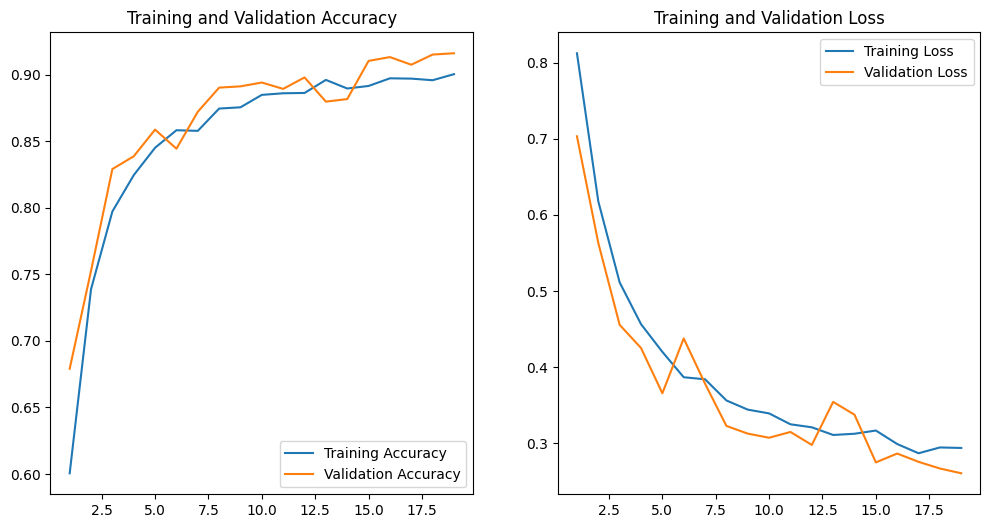

In [21]:
epochs_range= range(1, len(acc) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [37]:
#evaluasi model
test_results = model.evaluate(validation_generator, verbose=0)
print(f'Test Loss     : {test_results[0]:.4f}')
print(f'Test Accuracy : {test_results[1]:.4f}')

Test Loss     : 0.2703
Test Accuracy : 0.9083


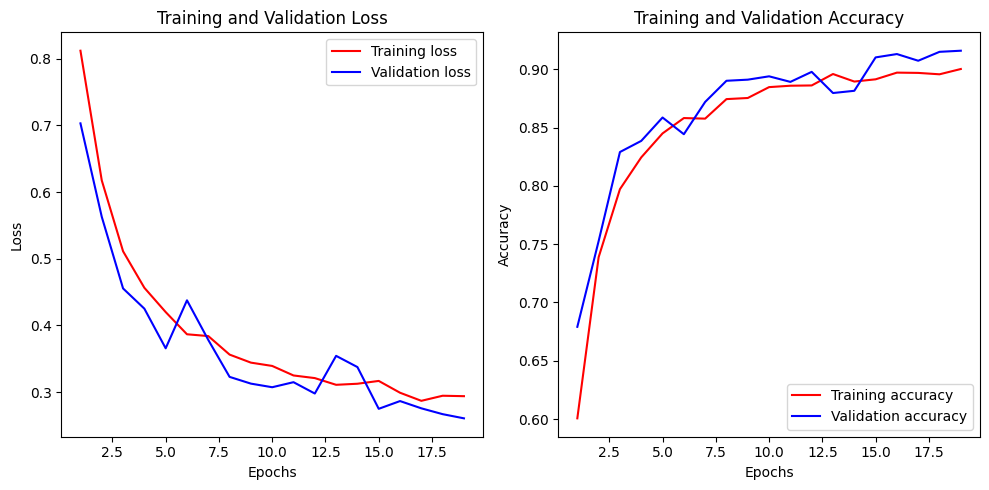

Test Loss     : 0.2936
Test Accuracy : 0.9054


In [23]:
import matplotlib.pyplot as plt

# Evaluating the model
test_results = model.evaluate(validation_generator, verbose=0)
test_loss = test_results[0]
test_accuracy = test_results[1]

# Visualizing test loss and accuracy
epochs = range(1, len(history.history['accuracy']) + 1)  # Assuming you have the history object from model training

# Plotting test loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], 'r', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting test accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['accuracy'], 'r', label='Training accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
# Print test loss and accuracy
print(f'Test Loss     : {test_loss:.4f}')
print(f'Test Accuracy : {test_accuracy:.4f}')


262/262 [==============================] - 22s 84ms/step


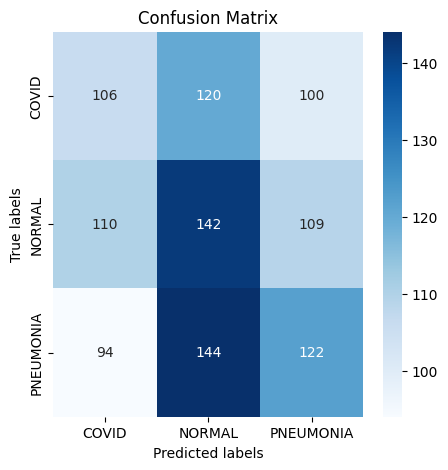

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have a validation dataset and true labels
# Generate predictions for the validation dataset
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = validation_generator.classes

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_indices, yticklabels=class_indices)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [43]:
# Get true labels for the validation dataset
true_labels = validation_generator.classes

# Make predictions on the validation dataset
predictions = model.predict(validation_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Generate classification report
from sklearn.metrics import classification_report

class_report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(class_report)


262/262 [==============================] - 34s 127ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.31      0.32       326
           1       0.32      0.37      0.34       361
           2       0.31      0.28      0.29       360

    accuracy                           0.32      1047
   macro avg       0.32      0.32      0.32      1047
weighted avg       0.32      0.32      0.32      1047



In [26]:
from tensorflow.keras.models import load_model

# Untuk menyimpan model
model.save('model_tubesML.h5')

In [34]:

# Untuk memuat kembali model
model = load_model('model_tubesML_terbaik.h5')

1/1 [==============================] - 0s 70ms/step
[[0.99510765 0.00139887 0.00349353]]


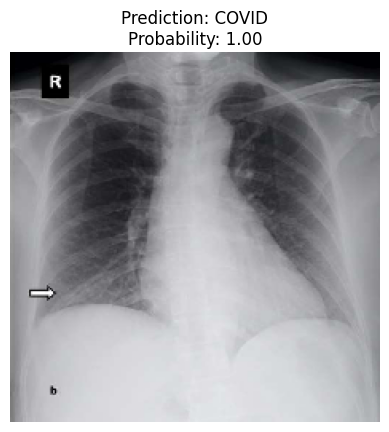

Image Path: C:/Alvito/UNPAD/SEMESTER 7/Machine Learning aweu/Tubes_ML/Chest X-Ray/validation/COVID/COVID_349.png


In [38]:
import tkinter as tk
from tkinter import filedialog
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Function to predict an uploaded image
def predict_uploaded_image(model):
    file_path = filedialog.askopenfilename()
    if file_path:
        predict_image(model, file_path)
        print("Image Path:", file_path)

# Function to predict an image given its path
def predict_image(model, image_path):
    labels = ['COVID', 'NORMAL', 'PNEUMONIA']

    img = image.load_img(image_path, target_size=(150, 150))
    img = image.img_to_array(img)
    img = img / 255.0

    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    print(prediction)

    predicted_class = labels[np.argmax(prediction)]
    predicted_probability = np.max(prediction)

    plt.figure()
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.title(f'Prediction: {predicted_class}\nProbability: {predicted_probability:.2f}')
    plt.axis('off')
    plt.show()
    # Close the root window after displaying the image and prediction
    root.destroy()

# Create Tkinter GUI
root = tk.Tk()
root.title("Image Prediction")

# Function to trigger image upload and prediction
def on_button_click():
    predict_uploaded_image(model)  # Replace 'loaded_model' with your model variable

# Create a button to upload the image
button = tk.Button(root, text="Upload Image", command=on_button_click)
button.pack()

# Run the Tkinter main loop
root.mainloop()


1/1 [==============================] - 0s 69ms/step
[[2.3959826e-04 9.5483929e-01 4.4921078e-02]]


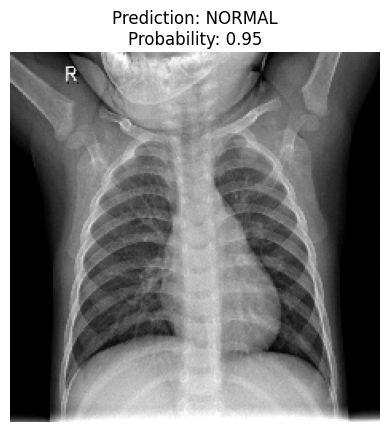

Image Path: C:/Alvito/UNPAD/SEMESTER 7/Machine Learning aweu/Tubes_ML/Chest X-Ray/validation/NORMAL/NORMAL_691.png


In [39]:
import tkinter as tk
from tkinter import filedialog
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Function to predict an uploaded image
def predict_uploaded_image(model):
    file_path = filedialog.askopenfilename()
    if file_path:
        predict_image(model, file_path)
        print("Image Path:", file_path)

# Function to predict an image given its path
def predict_image(model, image_path):
    labels = ['COVID', 'NORMAL', 'PNEUMONIA']

    img = image.load_img(image_path, target_size=(150, 150))
    img = image.img_to_array(img)
    img = img / 255.0

    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    print(prediction)

    predicted_class = labels[np.argmax(prediction)]
    predicted_probability = np.max(prediction)

    plt.figure()
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.title(f'Prediction: {predicted_class}\nProbability: {predicted_probability:.2f}')
    plt.axis('off')
    plt.show()
    # Close the root window after displaying the image and prediction
    root.destroy()

# Create Tkinter GUI
root = tk.Tk()
root.title("Image Prediction")

# Function to trigger image upload and prediction
def on_button_click():
    predict_uploaded_image(model)  # Replace 'loaded_model' with your model variable

# Create a button to upload the image
button = tk.Button(root, text="Upload Image", command=on_button_click)
button.pack()

# Run the Tkinter main loop
root.mainloop()


1/1 [==============================] - 0s 105ms/step
[[6.263675e-04 3.941673e-02 9.599569e-01]]


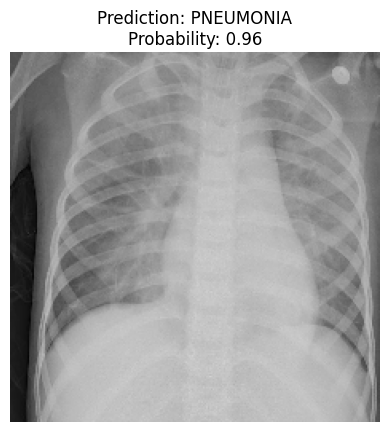

Image Path: C:/Alvito/UNPAD/SEMESTER 7/Machine Learning aweu/Tubes_ML/Chest X-Ray/validation/PNEUMONIA/PNEUMONIA_467.png


In [42]:
import tkinter as tk
from tkinter import filedialog
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Function to predict an uploaded image
def predict_uploaded_image(model):
    file_path = filedialog.askopenfilename()
    if file_path:
        predict_image(model, file_path)
        print("Image Path:", file_path)

# Function to predict an image given its path
def predict_image(model, image_path):
    labels = ['COVID', 'NORMAL', 'PNEUMONIA']

    img = image.load_img(image_path, target_size=(150, 150))
    img = image.img_to_array(img)
    img = img / 255.0

    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    print(prediction)

    predicted_class = labels[np.argmax(prediction)]
    predicted_probability = np.max(prediction)

    plt.figure()
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.title(f'Prediction: {predicted_class}\nProbability: {predicted_probability:.2f}')
    plt.axis('off')
    plt.show()
    # Close the root window after displaying the image and prediction
    root.destroy()

# Create Tkinter GUI
root = tk.Tk()
root.title("Image Prediction")

# Function to trigger image upload and prediction
def on_button_click():
    predict_uploaded_image(model)  # Replace 'loaded_model' with your model variable

# Create a button to upload the image
button = tk.Button(root, text="Upload Image", command=on_button_click)
button.pack()

# Run the Tkinter main loop
root.mainloop()
